# IMPORTING THE NECESSARY LIBRARIES

In [1]:
#Data Analysis and Data Wrangling
import numpy as np
import pandas as pd
import missingno as mn
from collections import Counter 

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

#Setting up plot styles
sns.set_context("paper")
style.use('fivethirtyeight')

#Ml Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import neighbors, tree, svm
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import make_scorer

from sklearn.metrics import log_loss

#Supress warnings
import warnings
warnings.filterwarnings('ignore')


## IMPORTING OUR TRAINING AND TESTING DATASET INTO PANDA'S DATAFRAME

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')


#Combining the training and testing dataset
combined = train_data.append(test_data)

* Let's see what our trianing data looks like

In [3]:
train_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [4]:
test_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


* Now we want to inspect our training dataframe and testing dataframe

In [5]:
#Database dimension
print('Database dimensions: ')
print('Database dimension - Kowope train_data', train_data.shape)
print('Database dimension - Kowope test_data', test_data.shape)
print('Database dimension - Kowope combined', combined.shape)

print('\n')

#Database Size
print('Database Size: ')
print('Database Size - Kowope train_data ', train_data.size)
print('Database Size - Kowope test_data ', test_data.size)
print('Database Size - Kowope combined ', combined.size)



Database dimensions: 
Database dimension - Kowope train_data (56000, 52)
Database dimension - Kowope test_data (24000, 51)
Database dimension - Kowope combined (80000, 52)


Database Size: 
Database Size - Kowope train_data  2912000
Database Size - Kowope test_data  1224000
Database Size - Kowope combined  4160000


## CHECKING THE DATA TYPE OF OUR FEATURES

In [6]:
print('KOWOPE TRAINING DATA INFO: ')
print('\n')
print(train_data.info())
print('\n')
print('='*100)
print('\n')

print('KOWOPE TESTING DATA INFO: ')
print('\n')
print(test_data.info())

KOWOPE TRAINING DATA INFO: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  f

In [7]:
train_data.describe(include='all')

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,56000,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,...,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,56000,3.511100e+04,55645.000000,4.494400e+04,56000
unique,56000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,Apcnt_1213780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,charge,NaN,NaN,NaN,no
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36373,NaN,NaN,NaN,42285
mean,NaN,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,...,0.368215,6.634511,0.563377,0.072520,0.095371,NaN,3.052449e+05,1.049061,6.005862e+05,NaN
std,NaN,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,...,0.412858,6.378946,0.196973,0.291146,0.335210,NaN,1.647757e+06,1.806160,5.842405e+06,NaN
min,NaN,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.048528,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000e+00,NaN
25%,NaN,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,...,0.000000,2.020000,0.411672,0.000000,0.000000,NaN,7.710079e+01,0.000000,4.560141e-02,NaN
50%,NaN,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,...,0.220000,5.050000,0.588648,0.000000,0.000000,NaN,3.181243e+02,0.000000,1.703996e-01,NaN
75%,NaN,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,...,0.628573,10.100000,0.753840,0.000000,0.000000,NaN,1.153022e+03,1.181754,4.993370e-01,NaN


# The Categorical Variables

In [8]:
#For the categorical variables.
combined.describe(include='O')

,Applicant_ID,form_field47,default_status
count,80000,80000,56000
unique,80000,2,2
top,Apcnt_1161212,charge,no
freq,1,51840,42285


* The Kowope training and testing data above both have 51 features, The training data contains an additional column which is the label/target of our ML models.

* We can see that both the training and testing data contain 49 numerical features and 2 categorical features.
* 'Applicant_ID' is the unique customer application Identification Number, it is the first categorical variable, and it is qualitative(ordinal)
* The 2nd categorical variable is 'form_field47' which is qualitative(nominal), it is the type of product that the applicant applied for. (C = Charge; L = Lending)
* Our target, default_status is also a categorical variable, we will change it to numerical variable later

### form_field_47
* form_field_47 is a categorical variable.
* form_field_47 contains the type of product that the applicant applied for. (C = Charge; L = Lending)

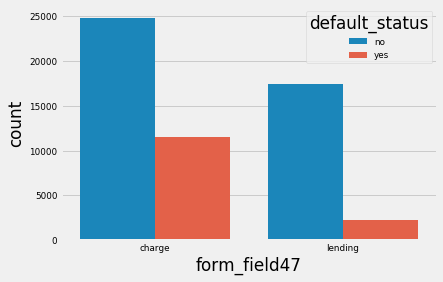

In [9]:
#For form_field_47 category
#I will visualize the frequency distribution with seaborn with respect to the target variable, default_status

sns.countplot(x='form_field47',hue='default_status',data = train_data)
plt.show()

# The Numerical Variables

* The Kowope training and testing dataset both have 51 features, The training data contains an additional column which is the label/target of our ML models.

* We can see that both the training and testing data contain 49 numerical features

* 'form_field1' and 'form_field2' are the Risk Scoring Factors. Both are numerical features(contionous), and quantitative(ratio)
* 'form_field3' to 'form_field5' are the Severity Features. They are all numerical features(continous), and quantitative(ratio)

* 'form_field6' to 'form_field15' are the Credit Features. They are all numerical features(contionous) and quantitative(ratio)

* 'form_field16' to 'form_field20' are the Credit Card Features. form_field16 to form_field20 are all numerical features(discrete) and quantitative(ratio) while form_field21 to form_field27 are all numerical features(continous) and they are quantitative(ratio)

* 'form_field28' to 'form_field39' are the Time-related Features. form_field28 to form_field33 are all numerical features(continous) while form_field34 to form_field39 are all numerical features(discrete) and quantitative(ratio)

* 'form_field40' to 'form_field41' are the Percentage related Features. They are all numerical features(contionous) and quantitative(ratio)

* 'form_field42' to 'form_field44', form_field46 and form_field48 to form_field50 are the Other Features. They are all numerical features(contionous) and quantitative(ratio). form_field45 is a numerical variable(discrete), and it is quantitative(ratio).

# NULL VALUES CALCULATION

In [10]:
#Defining a function to count the null values in our dataset, and the percentage of null values in each feature, and creating 
#a new dataframe to store our results

def null_counter(dataframe):
    """A function to calculate the number and % of null values in a dataframe."""
    null_values = {}
    
    #Getting all the column titles
    col = dataframe.columns
    
    #Getting the number of missing values in each column of our dataframe
    null_count = dataframe.isnull().sum()
    
    #Calculating the percentage of missing values in each column
    null_val = []
    for i in col:
        null_perc = (train_data[i].isnull().sum()*100) / train_data.shape[0]
        null_train_percentage = pd.DataFrame((test_data.isnull().sum())*100/test_data.shape[0]).reset_index()
        null_val.append(null_perc)
        
    #Now making a dictionary containing the column titles, null values count and the % of null values 
    null_values['Columns'] = col
    null_values['Null values'] = null_count
    null_values['Null Values Percentage'] = null_val

    #drop=True prevents the index from showing when we print out our dataframe
    null_values = pd.DataFrame(null_values).reset_index(drop=True)
    return null_values

* Visualising the null values in the training data

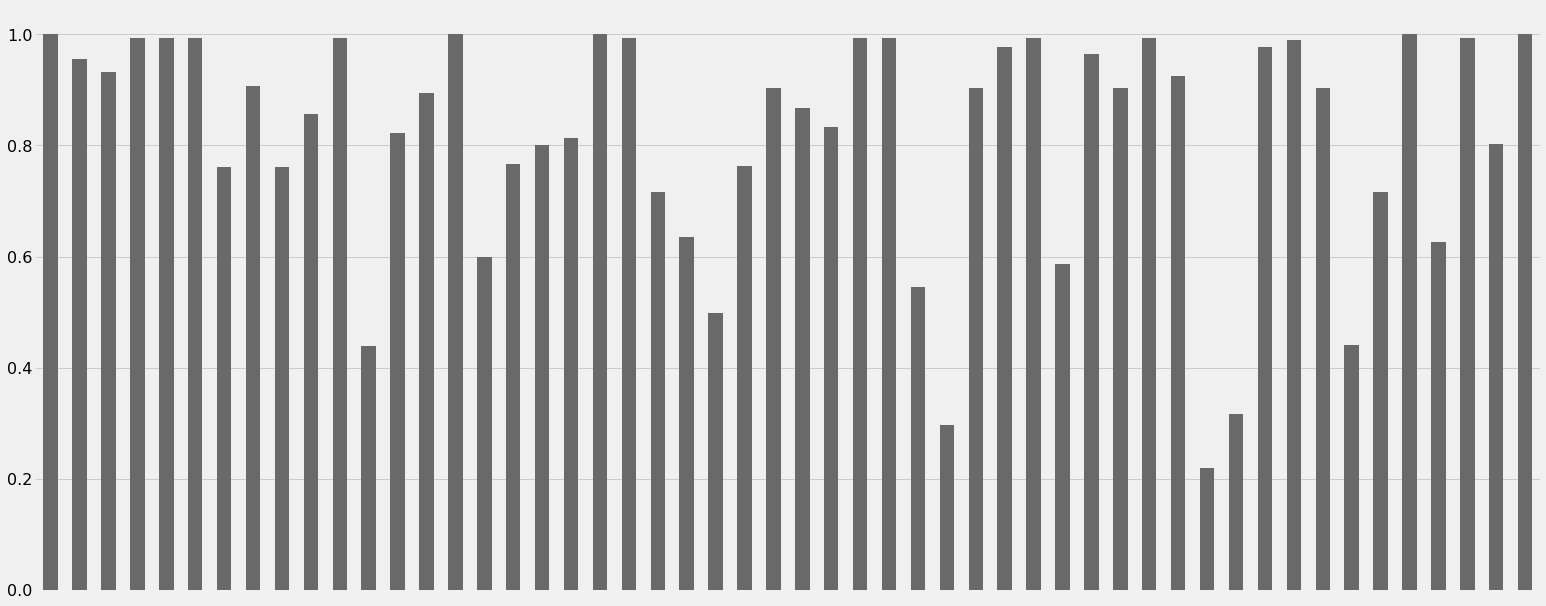

In [11]:
mn.bar(train_data)
plt.show()

* Now I will make a new Dataframe consisting of the Column names, null values, and % of null values in our training dataset

In [12]:
null_counter(train_data)

,Columns,Null values,Null Values Percentage
0,Applicant_ID,0,0.000000
1,form_field1,2529,4.516071
2,form_field2,3844,6.864286
3,form_field3,355,0.633929
4,form_field4,355,0.633929
5,form_field5,355,0.633929
6,form_field6,13360,23.857143
7,form_field7,5163,9.219643
8,form_field8,13360,23.857143
9,form_field9,8008,14.300000


### Most of our features are incomplete, and we will fill the missing values later

* Visualizing the Testing Dataset

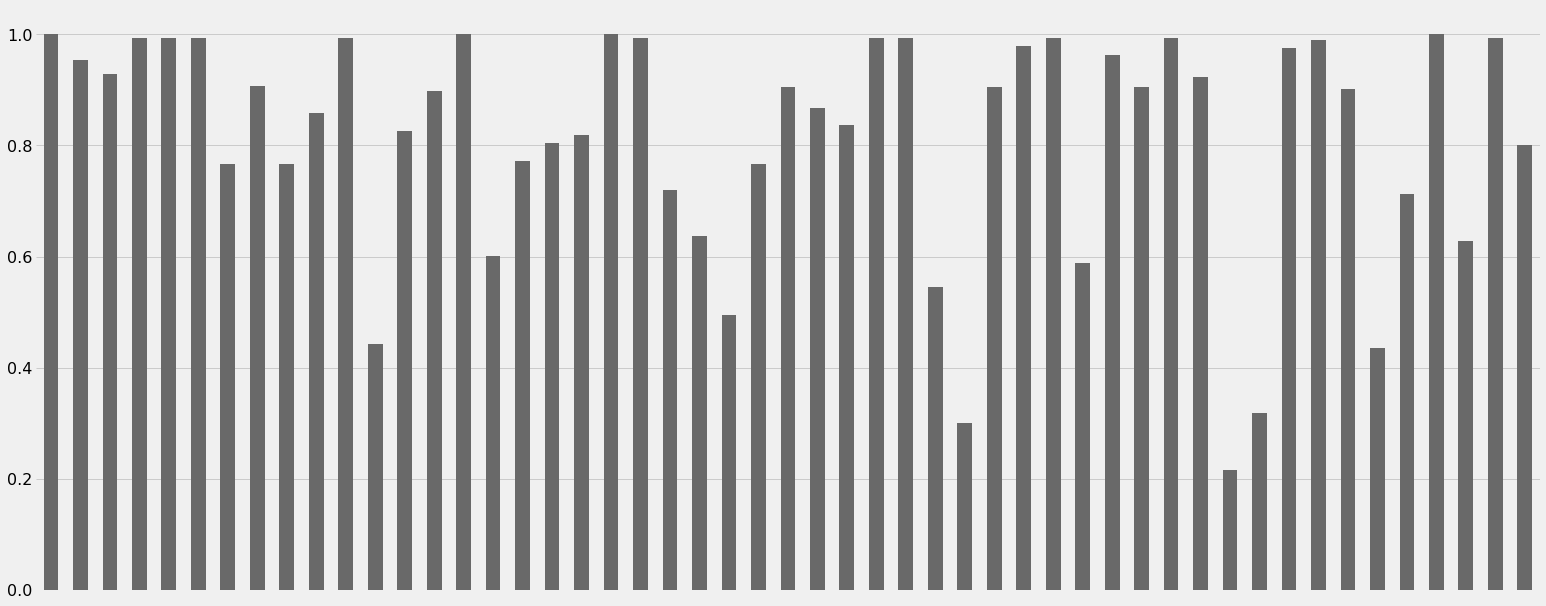

In [13]:
mn.bar(test_data)
plt.show()

* Now I will make a new Dataframe consisting of the Column names, null values, and % of null values in our training dataset

In [14]:
null_counter(test_data)

,Columns,Null values,Null Values Percentage
0,Applicant_ID,0,0.000000
1,form_field1,1110,4.516071
2,form_field2,1709,6.864286
3,form_field3,146,0.633929
4,form_field4,146,0.633929
5,form_field5,146,0.633929
6,form_field6,5604,23.857143
7,form_field7,2231,9.219643
8,form_field8,5604,23.857143
9,form_field9,3400,14.300000


### Most of the features in our testing dataset are also missing and we will fill them accordingly later.

## Visualizing our target

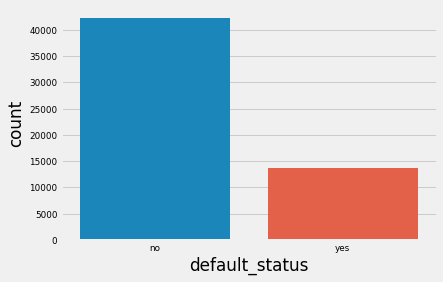

In [15]:
sns.countplot(train_data['default_status'])
plt.show()

In [16]:
train_data['default_status'].value_counts(normalize=True) * 100

no     75.508929
yes    24.491071
Name: default_status, dtype: float64

* In the training dataset we are working with, we can see that most of the customers(75%) defaulted on their loan payment i.e. they failed to pay within the agreed period of time

### Label Encoding our target
* I will be doing this manually

In [17]:
#Our label/target is a categorical binary classifier, and we have to convert it to a numerical binary classifier

def convert_label(value):
    out = 0
    
    if value == 'yes':
        out = 1
    else:
        out = 0
    return out
    

train_data['default_status'] = train_data['default_status'].apply(convert_label).astype(int)


In [18]:
train_data['default_status'].head()

0    0
1    0
2    1
3    0
4    0
Name: default_status, dtype: int32

## Correlation Coefficient

* The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data

In [19]:
#Find correlation between the features and the target

correlations = train_data.corr()['default_status'].sort_values()

In [20]:
print("Most Positive correlations:\n", correlations.tail(10))
print("\nMost Negative correlations:\n", correlations.head(10))

Most Positive correlations:
 form_field2       0.226313
form_field35      0.254479
form_field18      0.265692
form_field17      0.269507
form_field16      0.275836
form_field23      0.318622
form_field22      0.322421
form_field21      0.325634
form_field42      0.329039
default_status    1.000000
Name: default_status, dtype: float64

Most Negative correlations:
 form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field29   -0.209252
form_field9    -0.206441
Name: default_status, dtype: float64


* The feature with the highest correlation with the target is form_field_42
* It is the financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.

In [21]:
#Visualizing form_field_42 using a histogram

Text(0, 0.5, 'Count')

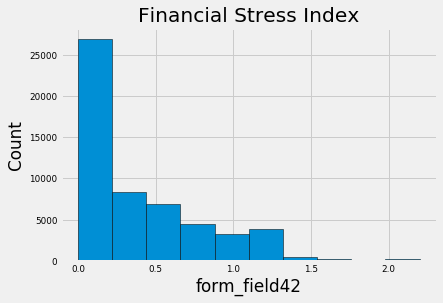

In [22]:
plt.hist(train_data['form_field42'], edgecolor = 'k', bins = 10)
plt.title('Financial Stress Index') 
plt.xlabel('form_field42')
plt.ylabel('Count')

### Visualizing the frequency distribution of our numerical variables

In [23]:
#To store all the column names in a list called 'cols'
col = train_data.columns

cols = []
for i in col:
    cols.append(i)
    
len(cols)

52

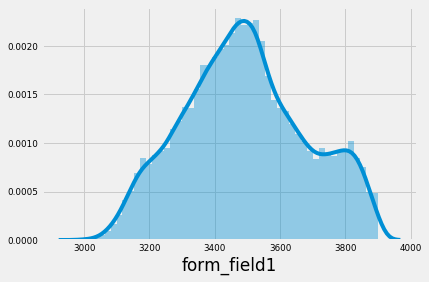

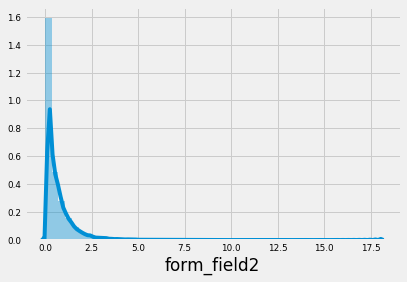

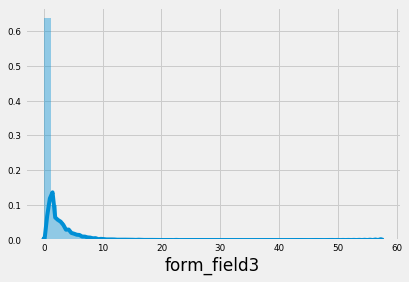

Bandwidth Error
Bandwidth Error


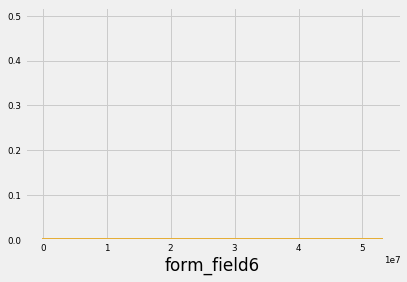

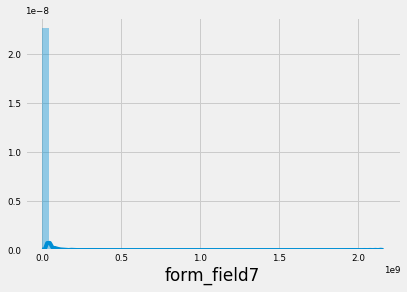

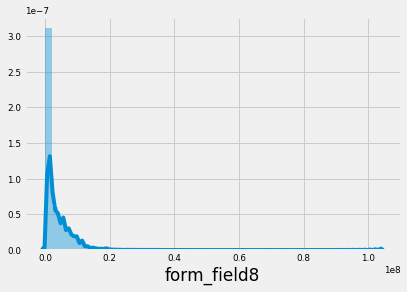

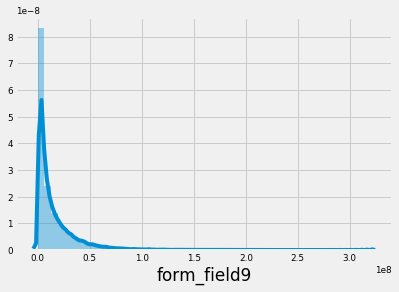

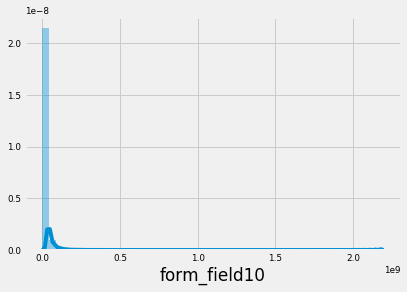

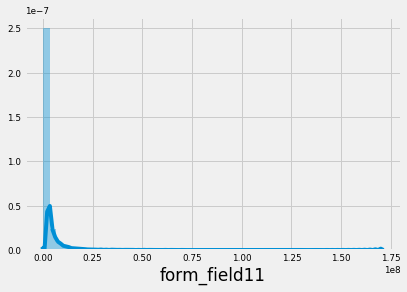

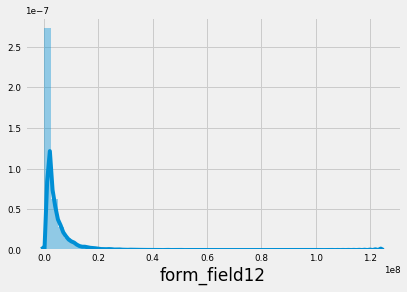

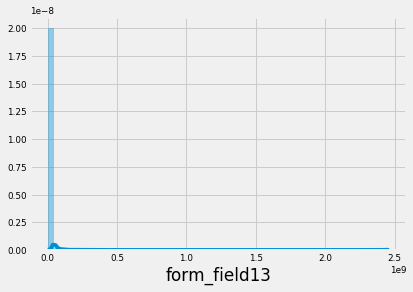

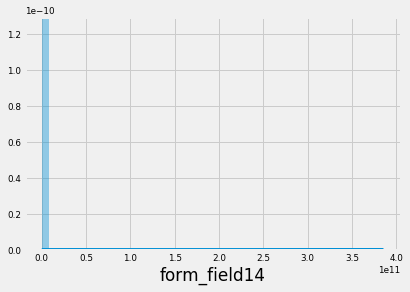

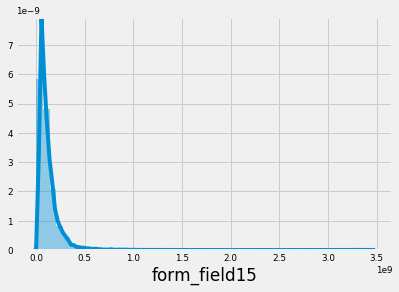

Bandwidth Error
Bandwidth Error
Bandwidth Error


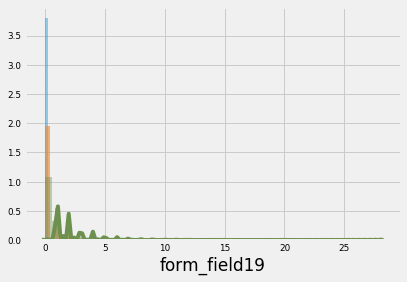

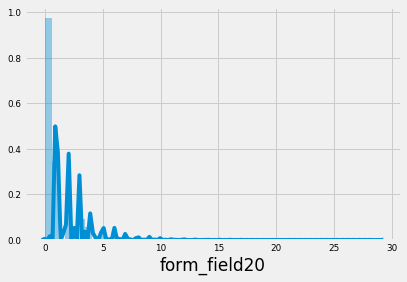

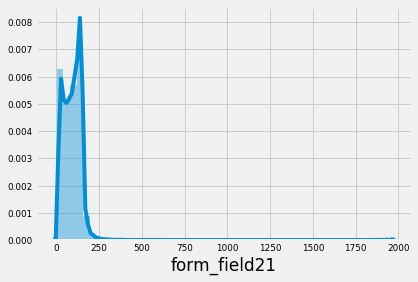

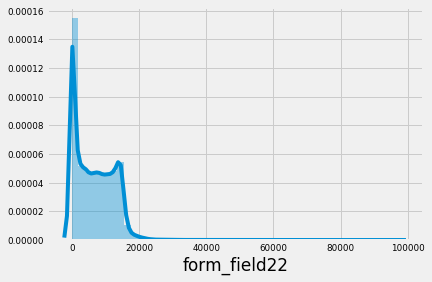

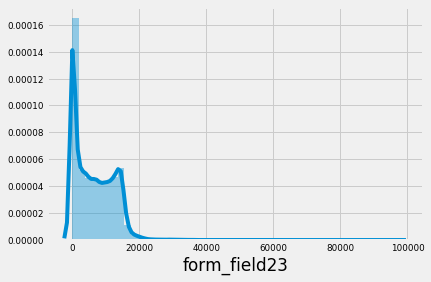

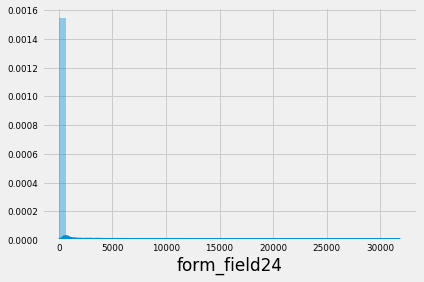

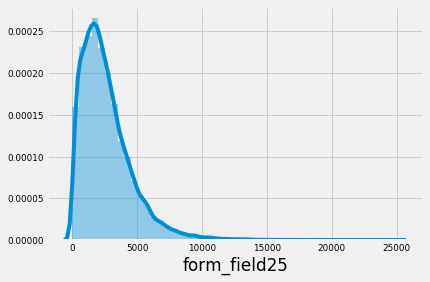

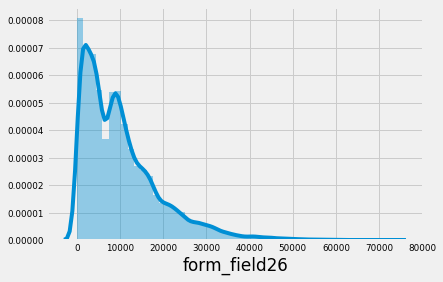

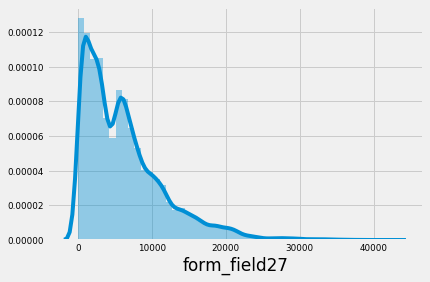

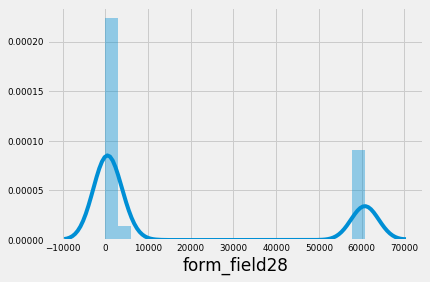

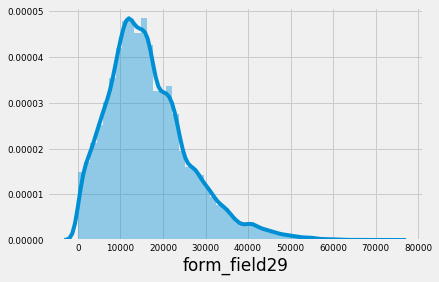

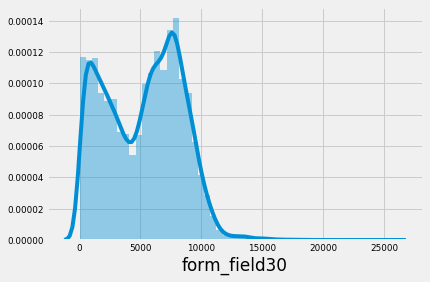

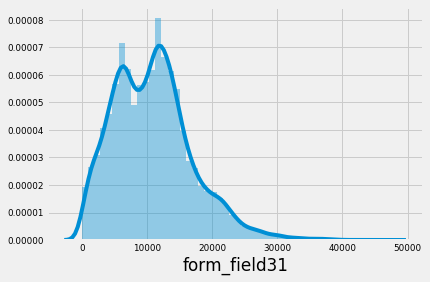

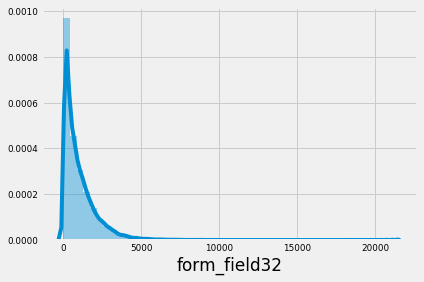

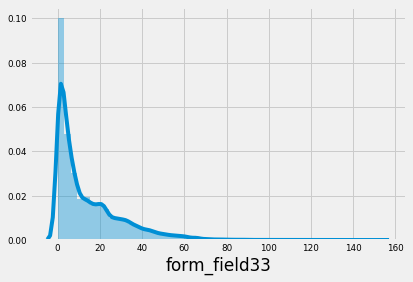

Bandwidth Error
Bandwidth Error


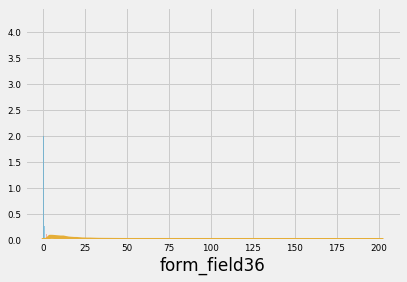

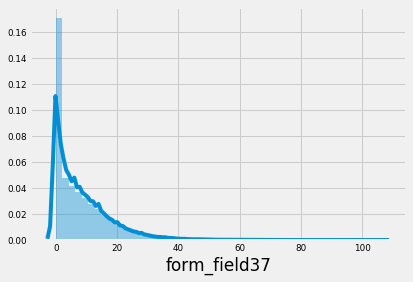

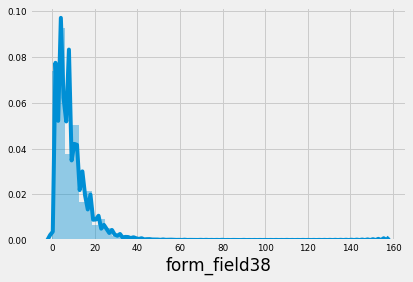

Bandwidth Error


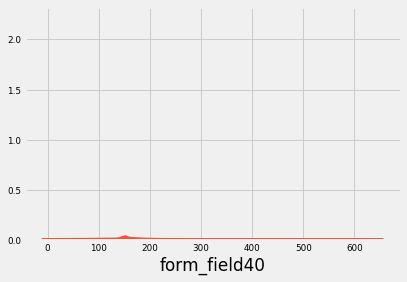

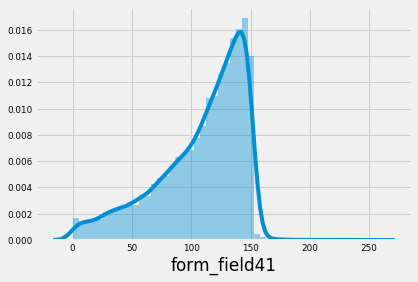

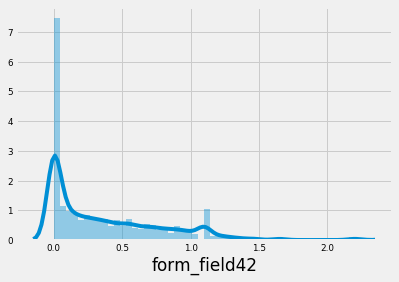

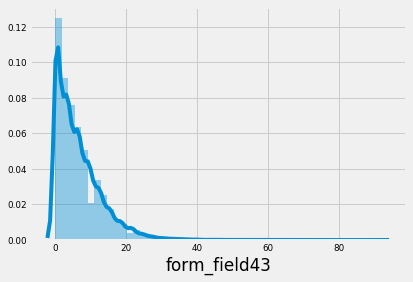

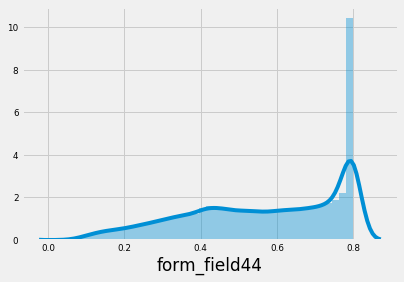

Bandwidth Error
Bandwidth Error


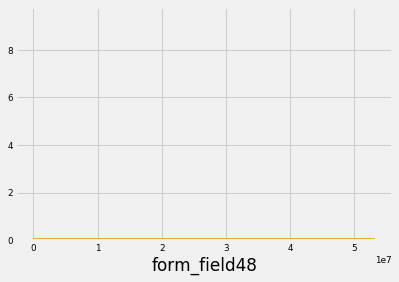

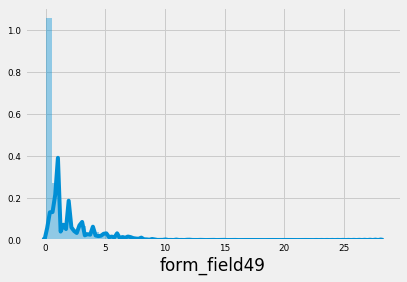

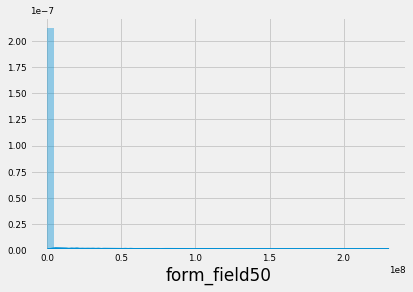

In [24]:
for i in cols:
    if i != 'Applicant_ID' and i != 'form_field47' and i != 'default_status':
        
        try:
            sns.distplot(train_data[i])
            plt.show()
            
        except RuntimeError:
            print('Bandwidth Error')
        else:
            continue

* We can see that most of our features are not normally distributed 

## Dropping features we are not going to be using 

In [25]:
#I will drop form_field 48 and form_field49, which are undefined features

for data in [train_data, test_data]:
    data.drop(['form_field48'], 1, inplace = True)
    data.drop(['form_field49'], 1, inplace = True)
    #data.drop(['form_field46'], 1, inplace = True)

#Dropping any other feature so far reduced  the accuracy, except dropping form_field 48 and 49 which are undefined variables.

## FILLING MISSING VALUES

* I am going to replace all null values with -99999 except in the columns, 'Application_ID', and 'form_field47' which are  categorical variables and have no missing values, and 'default_status' which is our label/target.

In [26]:
#To store all the column names in a list called 'cols'
col = train_data.columns

cols = []
for i in col:
    cols.append(i)
    
len(cols)

50

In [27]:
count = 0
for data in [train_data, test_data]:
    for column in cols:
        #Excluding the 3 categorical features
        if column != 'Applicant_ID' and column != 'form_field47' and column != 'default_status':
            if data[column].isnull().sum() != 0:
                data[column] = data[column].fillna(-99999)
                


* Now checking for null values:

In [28]:
test_data.isnull().sum()

Applicant_ID    0
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field50    0
dtype: int64

In [29]:
train_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,-99999.0000,-99999.0,0.392854,2.02,0.711632,0.0,0.0,charge,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,-99999.0000,-99999.0,0.314281,8.08,0.183584,-99999.0,0.0,charge,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-99999.0,956940.0,-99999.0,192944.0,...,149.6805,-99999.0,0.162965,18.18,0.791136,0.0,0.0,charge,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,-99999.0000,-99999.0,0.488884,2.02,0.685168,-99999.0,0.0,charge,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,150.0135,-99999.0,0.275000,12.12,0.438168,0.0,0.0,charge,0.045630,0


In [30]:
train_data.describe(include='all')

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field50,default_status
count,56000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000,5.600000e+04,56000.000000
unique,56000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,Apcnt_1213780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charge,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36373,NaN,NaN
mean,NaN,-1181.922589,-6863.704139,-632.876677,-633.075654,-631.978317,4.516156e+05,6.223043e+06,1.976180e+06,1.126383e+07,...,-78054.332893,-68231.078881,-2362.116859,-1007.708353,-9611.894653,-55922.623089,-28399.647714,NaN,4.622706e+05,0.244911
std,NaN,21491.517860,25284.695483,7936.761742,7936.746184,7936.840126,1.288346e+06,1.833529e+07,3.618687e+06,1.889007e+07,...,41426.450728,46594.349368,15187.817433,10020.625913,29476.393469,49647.898504,45093.674961,NaN,5.241410e+06,0.430038
min,NaN,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04,-9.999900e+04,-9.999900e+04,-9.999900e+04,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,NaN,-9.999900e+04,0.000000
25%,NaN,3336.000000,0.047700,0.000000,0.000000,0.000000,0.000000e+00,3.248150e+05,0.000000e+00,4.217732e+05,...,-99999.000000,-99999.000000,0.000000,2.020000,0.349148,-99999.000000,-99999.000000,NaN,7.502524e-03,0.000000
50%,NaN,3474.000000,0.226700,0.060000,0.000000,0.000000,4.006700e+04,2.174704e+06,3.765520e+05,3.712227e+06,...,-99999.000000,-99999.000000,0.206250,5.050000,0.548080,-99999.000000,0.000000,NaN,9.600000e-02,0.000000
75%,NaN,3610.000000,0.675700,1.270800,0.000000,0.000000,3.023502e+05,6.335740e+06,2.361230e+06,1.403308e+07,...,-99999.000000,79.999875,0.611116,10.100000,0.739474,0.000000,0.000000,NaN,3.800000e-01,0.000000


## Encoding Categorical Features

* I am going to OneHotEncode our categorical variables because I don't want to encode it based on priority

In [31]:
#Creating dummy variables for our categorical variable
#If we have N categories for a feature, we have to create N-1 dummies because if we include a seperate dummy variable for the 
#first category(charge) in the categorical variable, we will introduce multicolinearity.

#we will add an additional argument, 'drop_first' and set it to 'True' in order to make sure no dummy is created for the first
#category in our categorical variable
dummy_train = pd.get_dummies(train_data['form_field47'], drop_first = True)

dummy_test = pd.get_dummies(test_data['form_field47'], drop_first = True)

In [32]:
#Now concatenating the new dataframe with the trianing dataframe since they have no columns in common
#The dummy variables will be on the right
train_data = pd.concat([train_data, dummy_train], axis = 1)
#dropping the original categorical variable
train_data.drop(['form_field47'], 1, inplace=True)


#For the testing dataset
test_data = pd.concat([test_data, dummy_test], axis = 1)
#dropping the original categorical variable
test_data.drop(['form_field47'], 1, inplace=True)
test_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field50,lending
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,0.0,-99999.0,-99999.0000,0.825000,1.01,0.800000,-99999.0,0.0,0.011221,0
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,2.0,-99999.0,18.8415,0.507694,4.04,0.623248,1.0,0.0,0.043525,1
2,Apcnt_1000052,-99999.0,0.27505,0.0600,0.0000,0.0,-99999.0,-99999.0,-99999.0,-99999.0,...,-99999.0,-99999.0,-99999.0000,-99999.000000,0.00,-99999.000000,-99999.0,-99999.0,-99999.000000,0
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,0.0,-99999.0,-99999.0000,0.916663,2.02,0.464224,-99999.0,-99999.0,0.104029,0
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,0.0,-99999.0,-99999.0000,0.234047,23.23,0.726688,0.0,0.0,0.163124,1


In [33]:
#Renaming the dummy variable for training data
train_data['form_field_47_lending'] = train_data['lending']
train_data.drop(['lending'], 1, inplace = True)

#Renaming the dummy variable for testing data
test_data['form_field_47_lending'] = test_data['lending']
test_data.drop(['lending'], 1, inplace = True)

In [34]:
train_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field50,default_status,form_field_47_lending
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,-99999.0000,-99999.0,0.392854,2.02,0.711632,0.0,0.0,0.044335,0,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,-99999.0000,-99999.0,0.314281,8.08,0.183584,-99999.0,0.0,0.322436,0,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-99999.0,956940.0,-99999.0,192944.0,...,149.6805,-99999.0,0.162965,18.18,0.791136,0.0,0.0,0.011640,1,0
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,-99999.0000,-99999.0,0.488884,2.02,0.685168,-99999.0,0.0,0.082729,0,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,150.0135,-99999.0,0.275000,12.12,0.438168,0.0,0.0,0.045630,0,0


In [35]:
#Checking the correlation of the new encoded categorical variable
new_correlations = train_data.corr()['default_status'].sort_values()

new_correlations.tail(10)

form_field4       0.004214
form_field5       0.004273
form_field38      0.004308
form_field14      0.008272
form_field36      0.031367
form_field2       0.073161
form_field31      0.101788
form_field11      0.108075
form_field40      0.114553
default_status    1.000000
Name: default_status, dtype: float64

In [36]:
#Dropping the first column in our dataset
train_data.drop(['Applicant_ID'], 1, inplace = True)
train_data.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field50,default_status,form_field_47_lending
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,-99999.0000,-99999.0,0.392854,2.02,0.711632,0.0,0.0,0.044335,0,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,-99999.0000,-99999.0,0.314281,8.08,0.183584,-99999.0,0.0,0.322436,0,0
2,3276.0,0.53845,3.1510,0.0,6.282,-99999.0,956940.0,-99999.0,192944.0,1079864.0,...,149.6805,-99999.0,0.162965,18.18,0.791136,0.0,0.0,0.011640,1,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,-99999.0000,-99999.0,0.488884,2.02,0.685168,-99999.0,0.0,0.082729,0,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,150.0135,-99999.0,0.275000,12.12,0.438168,0.0,0.0,0.045630,0,0


In [37]:
#Dropping the first column in our dataset
test_id = test_data['Applicant_ID']
test_data = test_data.drop(['Applicant_ID'], 1)
test_data.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field50,form_field_47_lending
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,0.0,-99999.0,-99999.0000,0.825000,1.01,0.800000,-99999.0,0.0,0.011221,0
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,2.0,-99999.0,18.8415,0.507694,4.04,0.623248,1.0,0.0,0.043525,1
2,-99999.0,0.27505,0.0600,0.0000,0.0,-99999.0,-99999.0,-99999.0,-99999.0,0.0,...,-99999.0,-99999.0,-99999.0000,-99999.000000,0.00,-99999.000000,-99999.0,-99999.0,-99999.000000,0
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,0.0,-99999.0,-99999.0000,0.916663,2.02,0.464224,-99999.0,-99999.0,0.104029,0
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,0.0,-99999.0,-99999.0000,0.234047,23.23,0.726688,0.0,0.0,0.163124,1


# CREATING A CLASS FOR STACKING OUR MODEL

* This is where the cross validation loop and other processes are built for easy training and stacking throughout our workflow... In this class, a variable "val_p" has been created. This is where all the predictions based on the validation set from each cross validation loop is stored, resulting to us having predictions based on the whole training data itself. Also, another variable "test_p" is where the test set predictions are stored.

In [38]:
class func() :
    def __init__(self, train, label, test, model, model_type, random_state):
        self.train, self.label, self.test = train, label, test
        self.model, self.model_type = model, model_type
        self.random_state = random_state
        
        assert self.model_type in ('catboost', 'xgboost', 'lgbm'), 'Incorrect model_type'
    def __call__(self, plot = True):
        return self.fit(plot)

    def fit(self, plot):
        def catboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,
                           verbose=50,use_best_model=True)
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict

        def xgboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            x_train_predict = self.model.predict_proba(X_train, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            return x_test_predict, x_train_predict

        def lgbm_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, num_iteration = self.model.best_iteration_)[:,1]
            x_train_predict = self.model.predict_proba(X_train, num_iteration = self.model.best_iteration_)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, num_iteration = self.model.best_iteration_)[:,1]
            return x_test_predict, x_train_predict


        self.val_p = np.zeros(self.train.shape[0])
        mean_val = []
        mean_train = []
        self.test_p = np.zeros(self.test.shape[0])
        splits = 5
        kf = StratifiedKFold(n_splits = splits)
        for fold_count, (train_index, test_index) in enumerate(kf.split(self.train, self.label)):
            X_train,X_test = self.train.iloc[train_index],self.train.iloc[test_index]
            y_train,y_test = self.label.iloc[train_index],self.label.iloc[test_index]

            print(f"================================Fold{fold_count+1}====================================")
            if self.model_type == 'catboost': x_test_predict, x_train_predict = catboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'xgboost': x_test_predict, x_train_predict = xgboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'lgbm': x_test_predict, x_train_predict = lgbm_fit(X_train, X_test, y_train, y_test)

            print('\nValidation scores', roc_auc_score(y_test, x_test_predict), log_loss(y_test, x_test_predict))
            print('Training scores', roc_auc_score(y_train, x_train_predict), log_loss(y_train, x_train_predict))
            mean_val.append(roc_auc_score(y_test, x_test_predict))
            mean_train.append(roc_auc_score(y_train, x_train_predict))

        if plot:
            feat_imp = pd.DataFrame(sorted(zip(self.model.feature_importances_,self.train.columns)), columns=['Value','Feature'])
            plt.figure(figsize=(30,25))
            sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", ascending=False))
            plt.ylabel('Feature Importance Score')
            plt.show()
        print(np.mean(mean_val), np.mean(mean_train), np.std(mean_val))
        return self.val_p, self.test_p/splits, self.model

In [39]:
test_data.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field50,form_field_47_lending
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,0.0,-99999.0,-99999.0000,0.825000,1.01,0.800000,-99999.0,0.0,0.011221,0
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,2.0,-99999.0,18.8415,0.507694,4.04,0.623248,1.0,0.0,0.043525,1
2,-99999.0,0.27505,0.0600,0.0000,0.0,-99999.0,-99999.0,-99999.0,-99999.0,0.0,...,-99999.0,-99999.0,-99999.0000,-99999.000000,0.00,-99999.000000,-99999.0,-99999.0,-99999.000000,0
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,0.0,-99999.0,-99999.0000,0.916663,2.02,0.464224,-99999.0,-99999.0,0.104029,0
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,0.0,-99999.0,-99999.0000,0.234047,23.23,0.726688,0.0,0.0,0.163124,1


In [40]:
train = train_data.copy()
target = train_data.default_status.copy()

#Dropping our target
train.drop('default_status', axis=1, inplace=True)

test = test_data.copy()
#test = test.reset_index(drop=True)

In [41]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field50,form_field_47_lending
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.0,-99999.0000,-99999.0,0.392854,2.02,0.711632,0.0,0.0,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.0,-99999.0000,-99999.0,0.314281,8.08,0.183584,-99999.0,0.0,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,-99999.0,956940.0,-99999.0,192944.0,1079864.0,...,0.0,149.6805,-99999.0,0.162965,18.18,0.791136,0.0,0.0,0.011640,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,1.0,-99999.0000,-99999.0,0.488884,2.02,0.685168,-99999.0,0.0,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.0,150.0135,-99999.0,0.275000,12.12,0.438168,0.0,0.0,0.045630,0


## BUILDING OUR MODELS

### MODEL 1: CATBOOST MODEL

================================Fold1====================================
0:	test: 0.7836917	best: 0.7836917 (0)	total: 213ms	remaining: 35m 34s
50:	test: 0.8263186	best: 0.8263186 (50)	total: 2.46s	remaining: 7m 59s
100:	test: 0.8305391	best: 0.8305391 (100)	total: 4.37s	remaining: 7m 8s
150:	test: 0.8325417	best: 0.8325417 (150)	total: 6.14s	remaining: 6m 40s
200:	test: 0.8339875	best: 0.8339875 (200)	total: 7.64s	remaining: 6m 12s
250:	test: 0.8349696	best: 0.8349769 (247)	total: 9.1s	remaining: 5m 53s
300:	test: 0.8356993	best: 0.8356993 (300)	total: 10.6s	remaining: 5m 40s
350:	test: 0.8364584	best: 0.8364600 (349)	total: 12.1s	remaining: 5m 32s
400:	test: 0.8369565	best: 0.8369565 (400)	total: 13.9s	remaining: 5m 32s
450:	test: 0.8372909	best: 0.8372915 (449)	total: 15.4s	remaining: 5m 26s
500:	test: 0.8374772	best: 0.8374772 (500)	total: 17.3s	remaining: 5m 27s
550:	test: 0.8376464	best: 0.8376881 (540)	total: 18.9s	remaining: 5m 24s
600:	test: 0.8377835	best: 0.8377835 (600)	to

1400:	test: 0.8378689	best: 0.8378822 (1390)	total: 47.9s	remaining: 4m 53s
1450:	test: 0.8379480	best: 0.8379530 (1445)	total: 49.8s	remaining: 4m 53s
1500:	test: 0.8379802	best: 0.8379834 (1495)	total: 51.5s	remaining: 4m 51s
1550:	test: 0.8380482	best: 0.8380487 (1547)	total: 52.9s	remaining: 4m 48s
1600:	test: 0.8380274	best: 0.8380932 (1574)	total: 54.4s	remaining: 4m 45s
1650:	test: 0.8380431	best: 0.8380932 (1574)	total: 55.8s	remaining: 4m 42s
1700:	test: 0.8380840	best: 0.8380932 (1574)	total: 57.3s	remaining: 4m 39s
1750:	test: 0.8381102	best: 0.8381196 (1746)	total: 58.9s	remaining: 4m 37s
1800:	test: 0.8381490	best: 0.8381512 (1798)	total: 1m	remaining: 4m 36s
1850:	test: 0.8381162	best: 0.8381590 (1811)	total: 1m 2s	remaining: 4m 33s
1900:	test: 0.8380943	best: 0.8381590 (1811)	total: 1m 3s	remaining: 4m 31s
1950:	test: 0.8381209	best: 0.8381590 (1811)	total: 1m 5s	remaining: 4m 28s
2000:	test: 0.8381232	best: 0.8381590 (1811)	total: 1m 6s	remaining: 4m 26s
2050:	test: 0.8

1600:	test: 0.8328035	best: 0.8329317 (1294)	total: 51.2s	remaining: 4m 28s
1650:	test: 0.8327962	best: 0.8329317 (1294)	total: 52.8s	remaining: 4m 27s
1700:	test: 0.8328119	best: 0.8329317 (1294)	total: 54.4s	remaining: 4m 25s
1750:	test: 0.8328012	best: 0.8329317 (1294)	total: 55.9s	remaining: 4m 23s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8329316961
bestIteration = 1294

Shrink model to first 1295 iterations.

Validation scores 0.8329316961087831 0.41346102544478436
Training scores 0.8631843615733401 0.38134916332530827
================================Fold5====================================
0:	test: 0.7940132	best: 0.7940132 (0)	total: 35.4ms	remaining: 5m 54s
50:	test: 0.8375979	best: 0.8375979 (50)	total: 1.65s	remaining: 5m 20s
100:	test: 0.8419541	best: 0.8419541 (100)	total: 3.23s	remaining: 5m 16s
150:	test: 0.8438017	best: 0.8438017 (150)	total: 4.79s	remaining: 5m 12s
200:	test: 0.8453023	best: 0.8453023 (200)	total: 6.34s	remaining: 5m 9s
250:

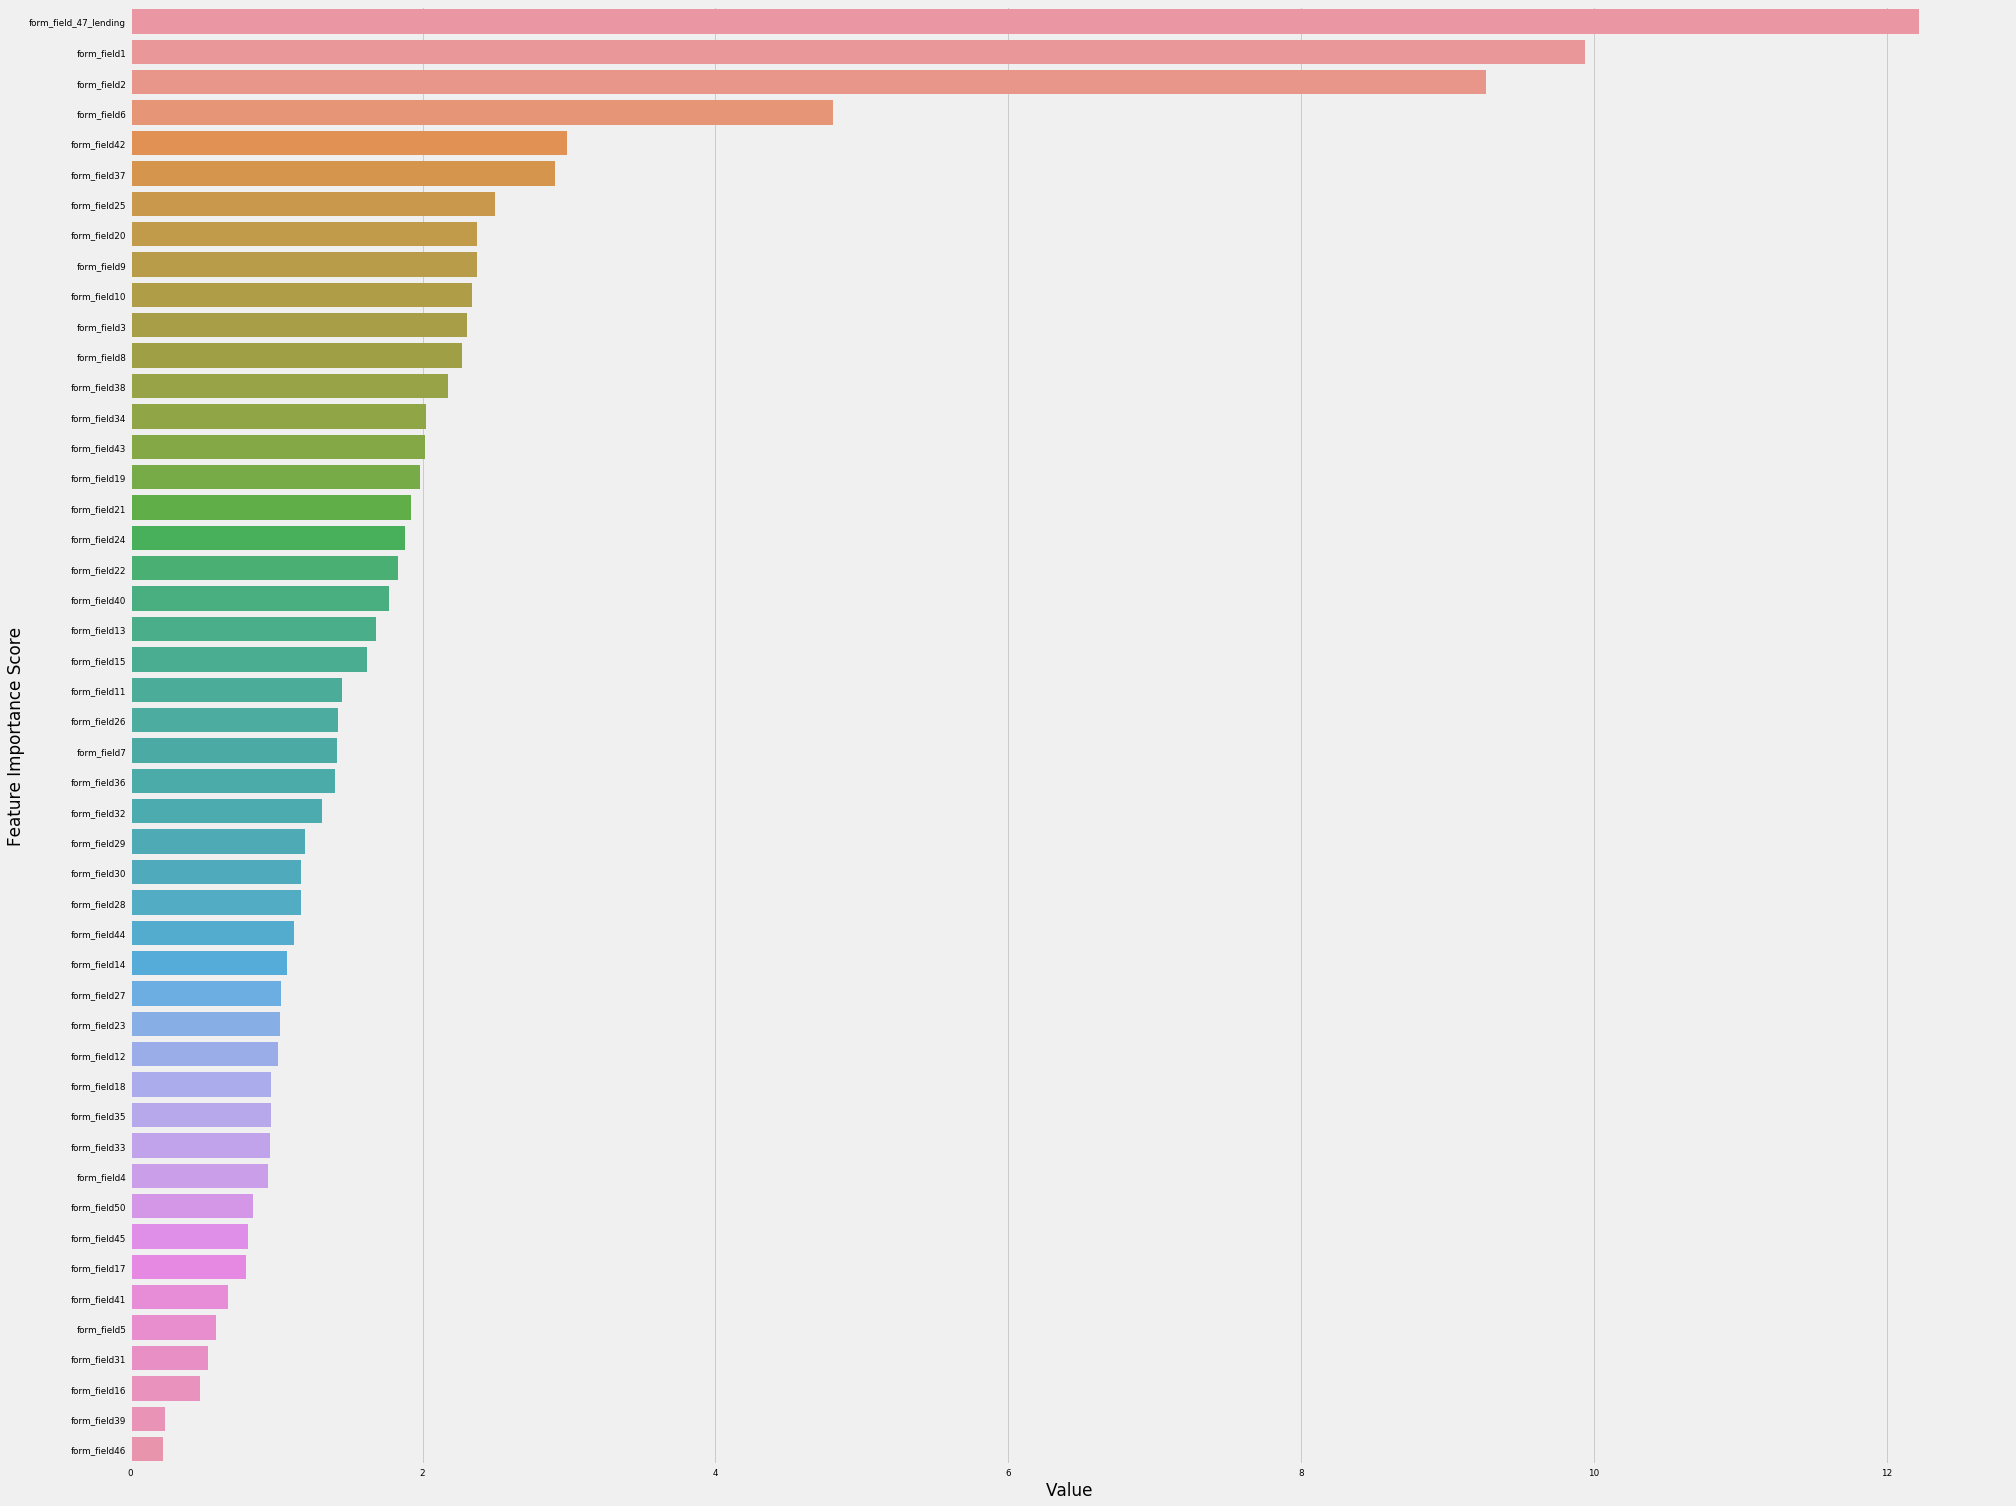

0.8407415679353395 0.8663710239283449 0.0056798278371094826


In [42]:
catboost = CatBoostClassifier(n_estimators=10000, max_depth=6, eval_metric='AUC', reg_lambda = 370)

func_= func(train, target, test, catboost, 'catboost', 1000)
val_p1, test_p1, model1 = func_()

In [43]:
#0.8407415679353395 0.8663710239283449 0.0056798278371094826


### MODEL 2: XGBOOST MODEL

================================Fold1====================================
[17:29:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.73409
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.79781
[2]	validation_0-auc:0.80819
[3]	validation_0-auc:0.81690
[4]	validation_0-auc:0.82020
[5]	validation_0-auc:0.82371
[6]	validation_0-auc:0.82496
[7]	validation_0-auc:0.82641
[8]	validation_0-auc:0.82734
[9]	validation_0-auc:0.82741
[10]	validation_0-auc:0.82748
[11]	validation_0-auc:0.82857
[12]	validation_0-auc:0.82906
[13]	validation_0-auc:0.82920
[14]	validation_0-auc:0.82929
[15]	validation_0-auc:0.82995
[16]

[18]	validation_0-auc:0.82346
[19]	validation_0-auc:0.82321
[20]	validation_0-auc:0.82339
[21]	validation_0-auc:0.82374
[22]	validation_0-auc:0.82338
[23]	validation_0-auc:0.82330
[24]	validation_0-auc:0.82353
[25]	validation_0-auc:0.82353
[26]	validation_0-auc:0.82364
[27]	validation_0-auc:0.82356
[28]	validation_0-auc:0.82340
[29]	validation_0-auc:0.82301
[30]	validation_0-auc:0.82278
[31]	validation_0-auc:0.82255
[32]	validation_0-auc:0.82238
[33]	validation_0-auc:0.82241
[34]	validation_0-auc:0.82239
[35]	validation_0-auc:0.82194
[36]	validation_0-auc:0.82206
[37]	validation_0-auc:0.82186
[38]	validation_0-auc:0.82191
[39]	validation_0-auc:0.82170
[40]	validation_0-auc:0.82156
[41]	validation_0-auc:0.82123
[42]	validation_0-auc:0.82139
[43]	validation_0-auc:0.82155
[44]	validation_0-auc:0.82132
[45]	validation_0-auc:0.82105
[46]	validation_0-auc:0.82109
[47]	validation_0-auc:0.82082
[48]	validation_0-auc:0.82044
[49]	validation_0-auc:0.82012
[50]	validation_0-auc:0.82008
[51]	valid

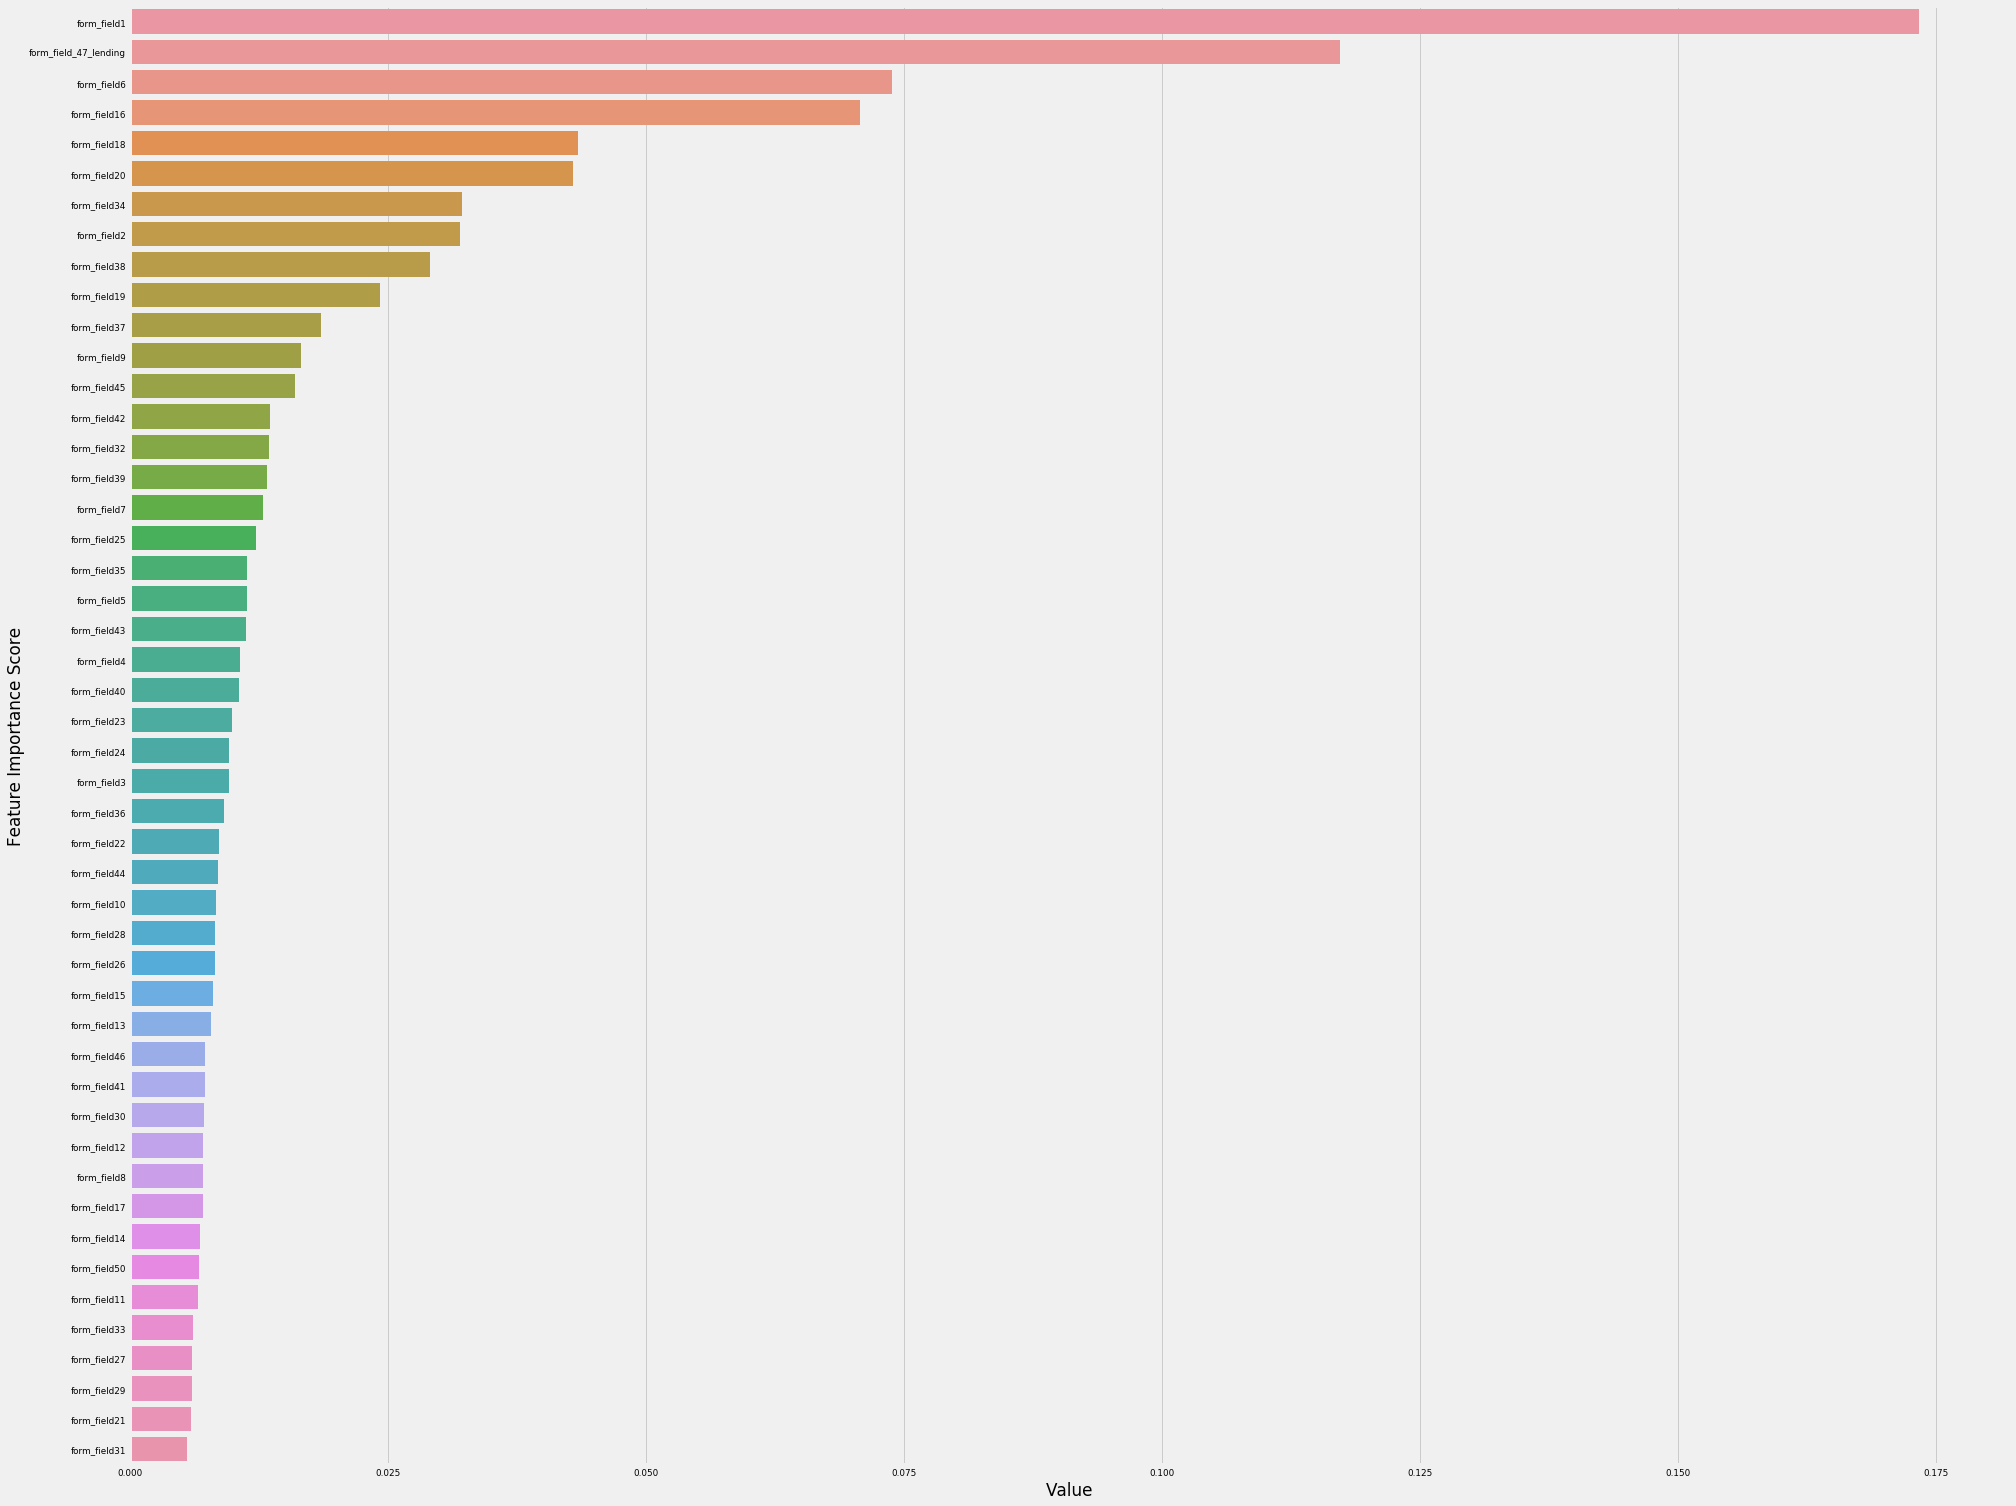

0.831300239408893 0.8700071036054625 0.0056755987586381675


In [44]:
xgboost = XGBClassifier(objective ='binary:logistic', 
                          eta = 0.99,
                          max_depth = 6, 
                          n_estimators = 5000,
                          reg_lambda = 500,
                          sub_sample = 0.8,
                          colsample_bytree = 0.8)

func_= func(train, target, test, xgboost, 'xgboost', 1000)
val_p2, test_p2, model2 = func_()

In [45]:
#0.8313003428680897 0.8700071036054625 0.005675608330610235

### MODEL 3: LBGM MODEL

================================Fold1====================================
[1]	valid_0's auc: 0.797896
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.802952
[3]	valid_0's auc: 0.80587
[4]	valid_0's auc: 0.809436
[5]	valid_0's auc: 0.812309
[6]	valid_0's auc: 0.815224
[7]	valid_0's auc: 0.815805
[8]	valid_0's auc: 0.816866
[9]	valid_0's auc: 0.819256
[10]	valid_0's auc: 0.819943
[11]	valid_0's auc: 0.821135
[12]	valid_0's auc: 0.822603
[13]	valid_0's auc: 0.823552
[14]	valid_0's auc: 0.824138
[15]	valid_0's auc: 0.82481
[16]	valid_0's auc: 0.825497
[17]	valid_0's auc: 0.825863
[18]	valid_0's auc: 0.826459
[19]	valid_0's auc: 0.826871
[20]	valid_0's auc: 0.827494
[21]	valid_0's auc: 0.827903
[22]	valid_0's auc: 0.828422
[23]	valid_0's auc: 0.828866
[24]	valid_0's auc: 0.829408
[25]	valid_0's auc: 0.829654
[26]	valid_0's auc: 0.830045
[27]	valid_0's auc: 0.830204
[28]	valid_0's auc: 0.830389
[29]	valid_0's auc: 0.830607
[30]	valid_0's auc: 0.830759
[31]	v

[94]	valid_0's auc: 0.834513
[95]	valid_0's auc: 0.834431
[96]	valid_0's auc: 0.834375
[97]	valid_0's auc: 0.834341
[98]	valid_0's auc: 0.834344
[99]	valid_0's auc: 0.834362
[100]	valid_0's auc: 0.834392
[101]	valid_0's auc: 0.83439
[102]	valid_0's auc: 0.834413
[103]	valid_0's auc: 0.834376
[104]	valid_0's auc: 0.834374
[105]	valid_0's auc: 0.834386
[106]	valid_0's auc: 0.83439
[107]	valid_0's auc: 0.834443
[108]	valid_0's auc: 0.83449
[109]	valid_0's auc: 0.834456
[110]	valid_0's auc: 0.834411
[111]	valid_0's auc: 0.834409
[112]	valid_0's auc: 0.834485
[113]	valid_0's auc: 0.834503
Early stopping, best iteration is:
[83]	valid_0's auc: 0.834626

Validation scores 0.8346255387044952 0.4119685467047478
Training scores 0.8663611206739021 0.3788370518706733
================================Fold3====================================
[1]	valid_0's auc: 0.801624
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.805373
[3]	valid_0's auc: 0.809379
[4]	valid_0's a

[92]	valid_0's auc: 0.830965
[93]	valid_0's auc: 0.830848
[94]	valid_0's auc: 0.830753
[95]	valid_0's auc: 0.830749
[96]	valid_0's auc: 0.830751
[97]	valid_0's auc: 0.830776
[98]	valid_0's auc: 0.830819
[99]	valid_0's auc: 0.830858
[100]	valid_0's auc: 0.830813
[101]	valid_0's auc: 0.830862
[102]	valid_0's auc: 0.830851
[103]	valid_0's auc: 0.830838
[104]	valid_0's auc: 0.830809
[105]	valid_0's auc: 0.830703
[106]	valid_0's auc: 0.830732
[107]	valid_0's auc: 0.830749
[108]	valid_0's auc: 0.830819
[109]	valid_0's auc: 0.830807
[110]	valid_0's auc: 0.830809
[111]	valid_0's auc: 0.830718
[112]	valid_0's auc: 0.83067
[113]	valid_0's auc: 0.830687
[114]	valid_0's auc: 0.830679
[115]	valid_0's auc: 0.830663
[116]	valid_0's auc: 0.830666
[117]	valid_0's auc: 0.830721
[118]	valid_0's auc: 0.830773
[119]	valid_0's auc: 0.830743
Early stopping, best iteration is:
[89]	valid_0's auc: 0.830984

Validation scores 0.830983861184312 0.41583248293208014
Training scores 0.8696815277504939 0.37509961379

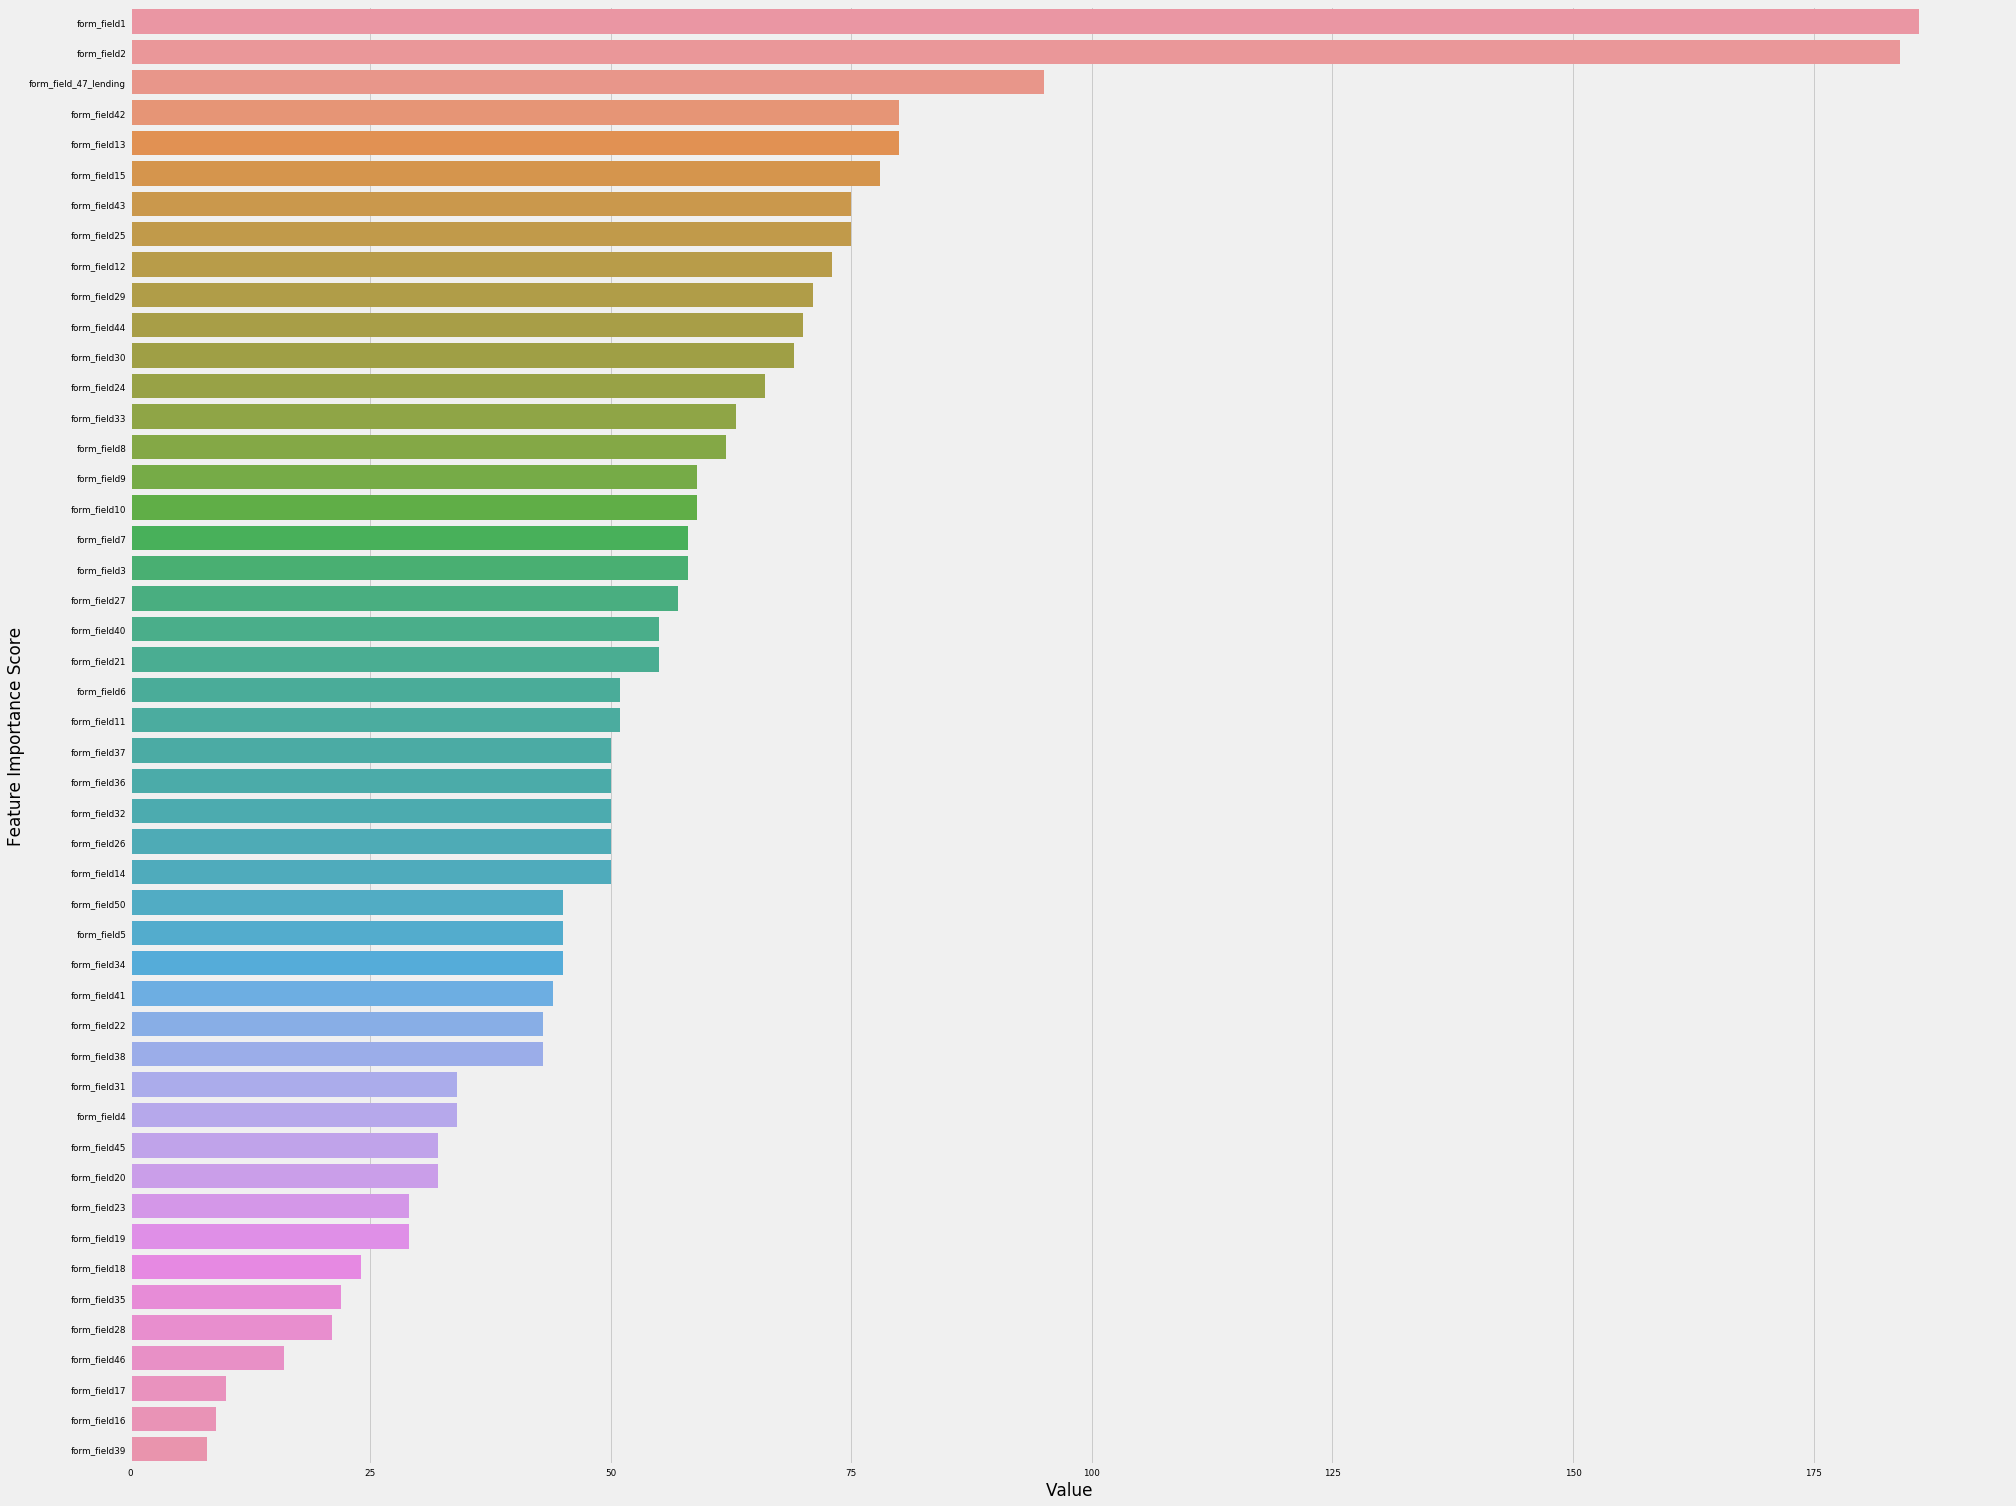

0.838550685802997 0.8735480697940916 0.0061875540792949634


In [46]:
lgb_model = LGBMClassifier(objective =  'binary', 
                            metric= 'auc',
                            boosting_type= 'gbdt',
                            lambda_l1= 0.0004912993970392775,
                            lambda_l2= 9.424350138808432,
                            num_leaves= 24,
                            feature_fraction= 1.0,
                            bagging_fraction= 0.9540416539312312,
                            bagging_freq= 7,
                            min_child_samples= 100, n_estimators = 300)

func_= func(train, target, test, lgb_model, 'lgbm', 1000)
val_p3, test_p3, model3 = func_()

In [47]:
#0.838550685802997 0.8735480697940916 0.0061875540792949634


# STACKING
* To stack, we use a simple algorithm as a meta-learner(Linear Regression) to finetune our predictions. We train this algorithm with the predictions of validation sets from all algorithms and use to produce the final predictions with the combination of the test set predictions from all algorithms.

In [48]:
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
stack = np.column_stack((val_p1, val_p2, val_p3))
stack_p = np.column_stack((test_p1, test_p2, test_p3))
predict = LinearRegression().fit(stack, target).predict(stack_p)

In [56]:
test_p2

array([0.16249264, 0.35722371, 0.38964925, ..., 0.1554813 , 0.53035395,
       0.24033271])

# SUBMISSION

In [50]:
submission = pd.read_csv('SampleSubmission.csv')
submission['default_status'] = predict

submission.to_csv('STACK.csv',index=False)

### STACKING THE MODEL GAVE ME A SCORE OF 0.8446 ON THE LEADERBOARD